In [2]:
import pandas as pd, numpy as np, seaborn as sn, matplotlib.pyplot as plt

df = pd.read_csv("hcc_dataset.csv", na_values='?')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'hcc_dataset.csv'

In [ ]:
print(df.shape[0])

df.info()


165
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    object 
 1   Symptoms        147 non-null    object 
 2   Alcohol         165 non-null    object 
 3   HBsAg           148 non-null    object 
 4   HBeAg           126 non-null    object 
 5   HBcAb           141 non-null    object 
 6   HCVAb           156 non-null    object 
 7   Cirrhosis       165 non-null    object 
 8   Endemic         126 non-null    object 
 9   Smoking         124 non-null    object 
 10  Diabetes        162 non-null    object 
 11  Obesity         155 non-null    object 
 12  Hemochro        142 non-null    object 
 13  AHT             162 non-null    object 
 14  CRI             163 non-null    object 
 15  HIV             151 non-null    object 
 16  NASH            143 non-null    object 
 17  Varices         113 non-null   

Analisando os histogramas abaixo é possível notar que "Age", "INR", "Hemoglobin", "MCV", "Albumin" e "Iron" parece seguir uma distribuição normal, o que espero que possa nos ajudar a completar os valores faltantes 

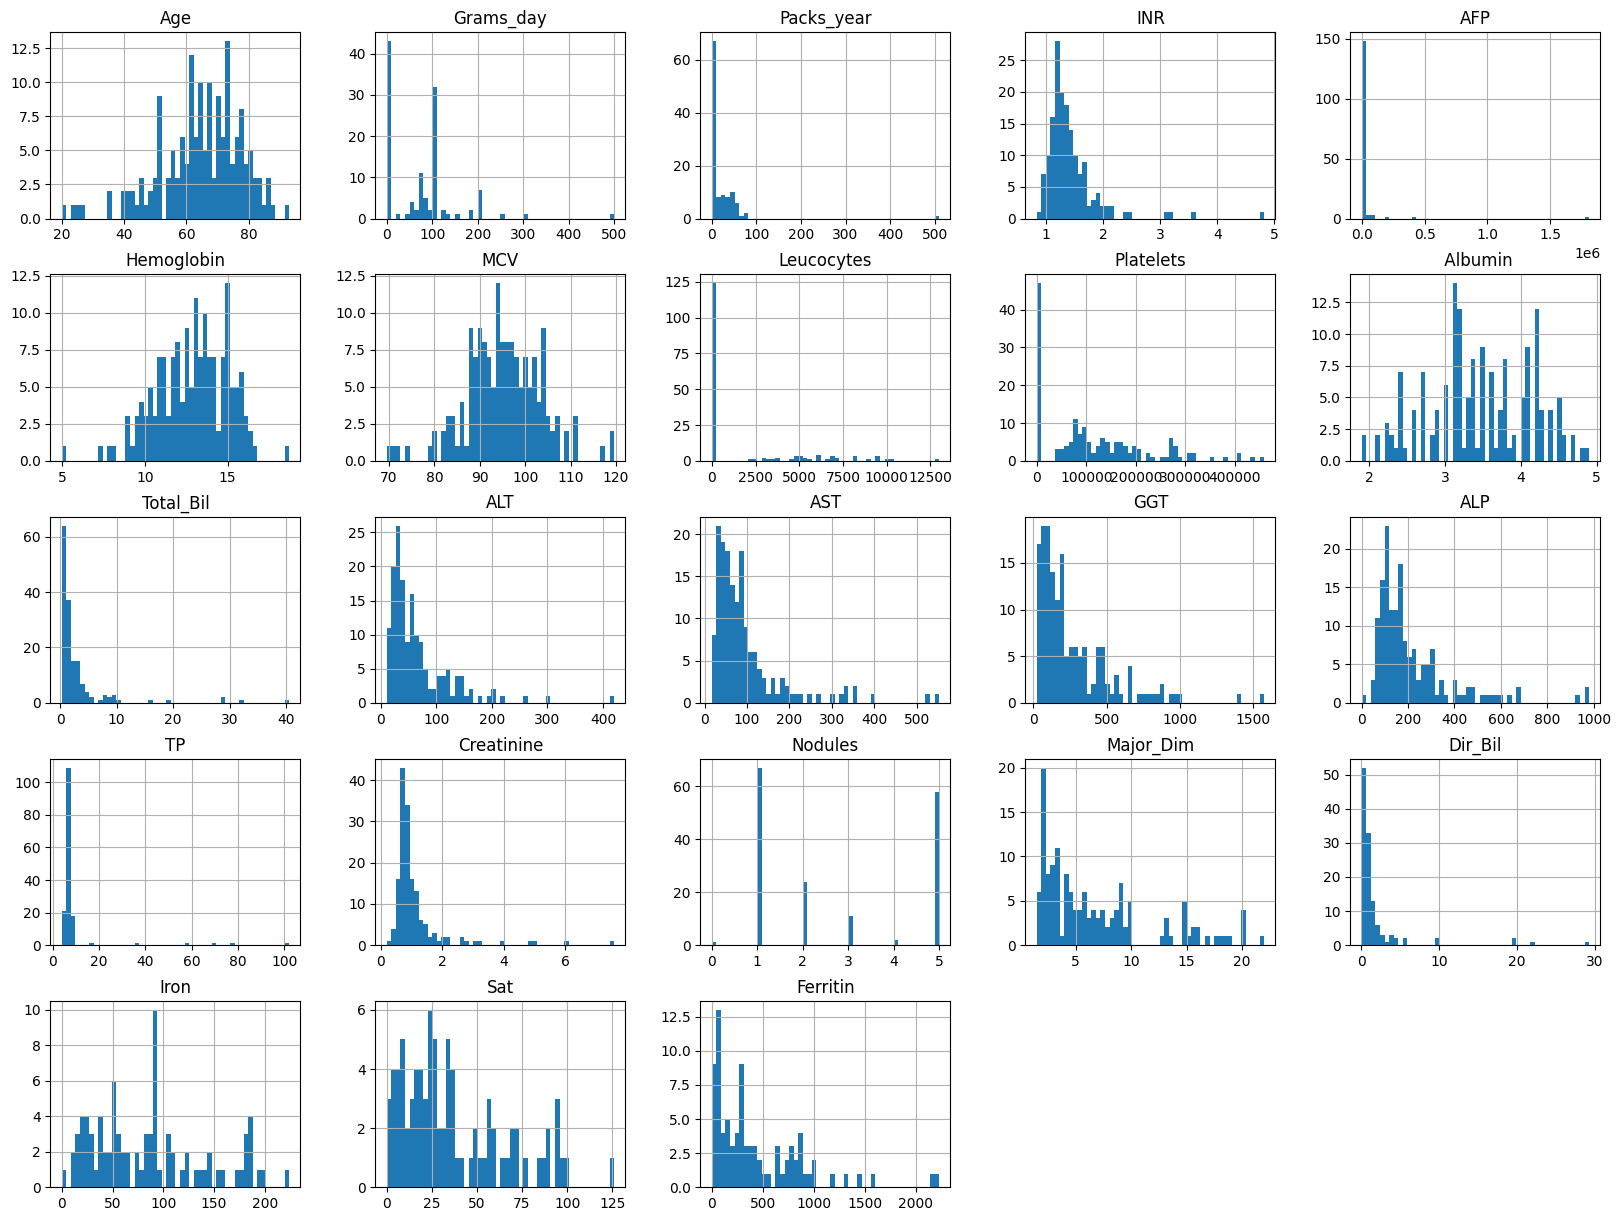

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Número de colunas com dados faltantes, se pode notar que há muitos dados faltantes em "Encephalopathy" e "Ascites", pelo que não me parecem boas features a se ter em consideração, 
li que features com mais de 80% de valores faltantes, em geral, não são boas features para avaliação, portanto se há por volta de 130 valores faltantes no nosso caso

In [ ]:
df.isnull().sum()


Gender              0
Symptoms           18
Alcohol             0
HBsAg              17
HBeAg              39
HBcAb              24
HCVAb               9
Cirrhosis           0
Endemic            39
Smoking            41
Diabetes            3
Obesity            10
Hemochro           23
AHT                 3
CRI                 2
HIV                14
NASH               22
Varices            52
Spleno             15
PHT                11
PVT                 3
Metastasis          4
Hallmark            2
Age                 0
Grams_day          48
Packs_year         53
PS                  0
Encephalopathy    143
Ascites           111
INR                 4
AFP                 8
Hemoglobin          3
MCV                 3
Leucocytes          3
Platelets           3
 Albumin            6
Total_Bil           5
ALT                 4
AST                 3
GGT                 3
ALP                 3
TP                 11
Creatinine          7
Nodules             2
Major_Dim          20
Dir_Bil   

In [ ]:
df = df.drop(columns=["Encephalopathy", "Ascites"])

Como a Hemoglobina, MCV, INR, Albumin e Ferro seguem uma distribuição normal substituímos os valores em falta pelo valor médio de cada atributo.

In [ ]:
features_normal = ["Hemoglobin", "MCV", "INR", " Albumin", "Iron"]

def fill_median(df:pd.DataFrame, features):
    for feature in features:
        df[feature] = df[feature].fillna(df[feature].median())
fill_median(df, features_normal)
df.isnull().sum()


Gender         0
Symptoms      18
Alcohol        0
HBsAg         17
HBeAg         39
HBcAb         24
HCVAb          9
Cirrhosis      0
Endemic       39
Smoking       41
Diabetes       3
Obesity       10
Hemochro      23
AHT            3
CRI            2
HIV           14
NASH          22
Varices       52
Spleno        15
PHT           11
PVT            3
Metastasis     4
Hallmark       2
Age            0
Grams_day     48
Packs_year    53
PS             0
INR            0
AFP            8
Hemoglobin     0
MCV            0
Leucocytes     3
Platelets      3
 Albumin       0
Total_Bil      5
ALT            4
AST            3
GGT            3
ALP            3
TP            11
Creatinine     7
Nodules        2
Major_Dim     20
Dir_Bil       44
Iron           0
Sat           80
Ferritin      80
Class          0
dtype: int64

In [ ]:
df.describe()

,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,...,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
count,165.000000,117.000000,112.000000,165.000000,1.570000e+02,165.000000,165.000000,162.000000,162.000000,165.000000,...,162.000000,162.000000,154.000000,158.000000,163.000000,145.000000,121.000000,165.000000,85.000000,85.000000
mean,64.690909,71.008547,20.464286,1.418897,1.929995e+04,12.882121,95.116667,1473.961549,113206.442654,3.443879,...,268.026543,212.211605,8.961039,1.127089,2.736196,6.851172,1.930000,84.354545,37.028941,438.997647
std,13.319534,76.277680,51.565130,0.472327,1.490983e+05,2.125649,8.328639,2909.106006,107118.632481,0.672537,...,258.750319,167.943548,11.728739,0.955856,1.797901,5.095042,4.210452,40.120263,28.993552,457.114454
min,20.000000,0.000000,0.000000,0.840000,1.200000e+00,5.000000,69.500000,2.200000,1.710000,1.900000,...,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,1.180000,5.200000e+00,11.500000,90.000000,5.100000,255.750000,3.100000,...,91.250000,108.250000,6.300000,0.700000,1.000000,3.000000,0.370000,78.000000,16.000000,84.000000
50%,66.000000,75.000000,0.000000,1.300000,3.300000e+01,13.050000,94.950000,7.200000,93000.000000,3.400000,...,179.500000,162.000000,7.050000,0.850000,2.000000,5.000000,0.700000,83.000000,27.000000,295.000000
75%,74.000000,100.000000,30.500000,1.530000,6.150000e+02,14.600000,100.300000,19.525000,171500.000000,4.000000,...,345.250000,261.500000,7.575000,1.100000,5.000000,9.000000,1.400000,85.000000,56.000000,706.000000
max,93.000000,500.000000,510.000000,4.820000,1.810346e+06,18.700000,119.600000,13000.000000,459000.000000,4.900000,...,1575.000000,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000


Vou dividir os dados pelo género do paciente.

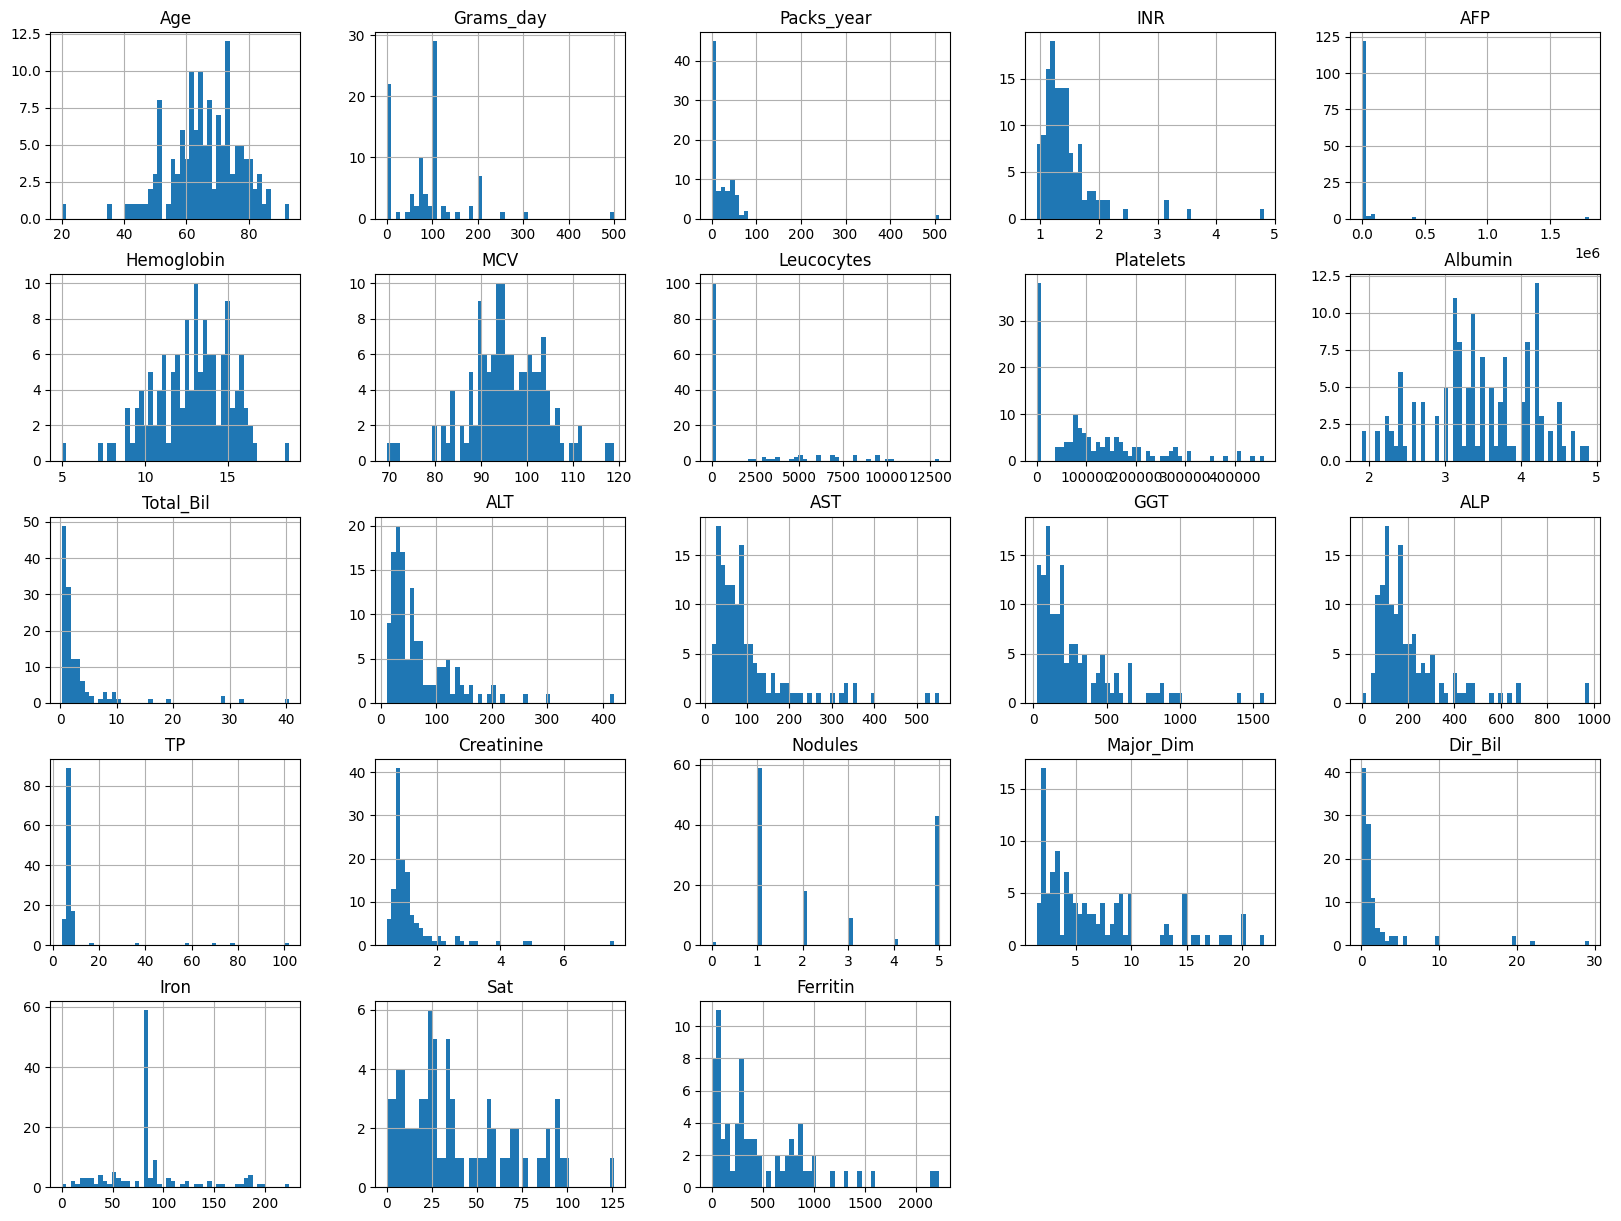

Número de homens infetados: 133


In [ ]:
male = df[df['Gender'] == 'Male']
male.hist(bins=50, figsize=(20,15))
#plt.show()
num_male=male.shape[0]
print("Número de homens infetados:",num_male)

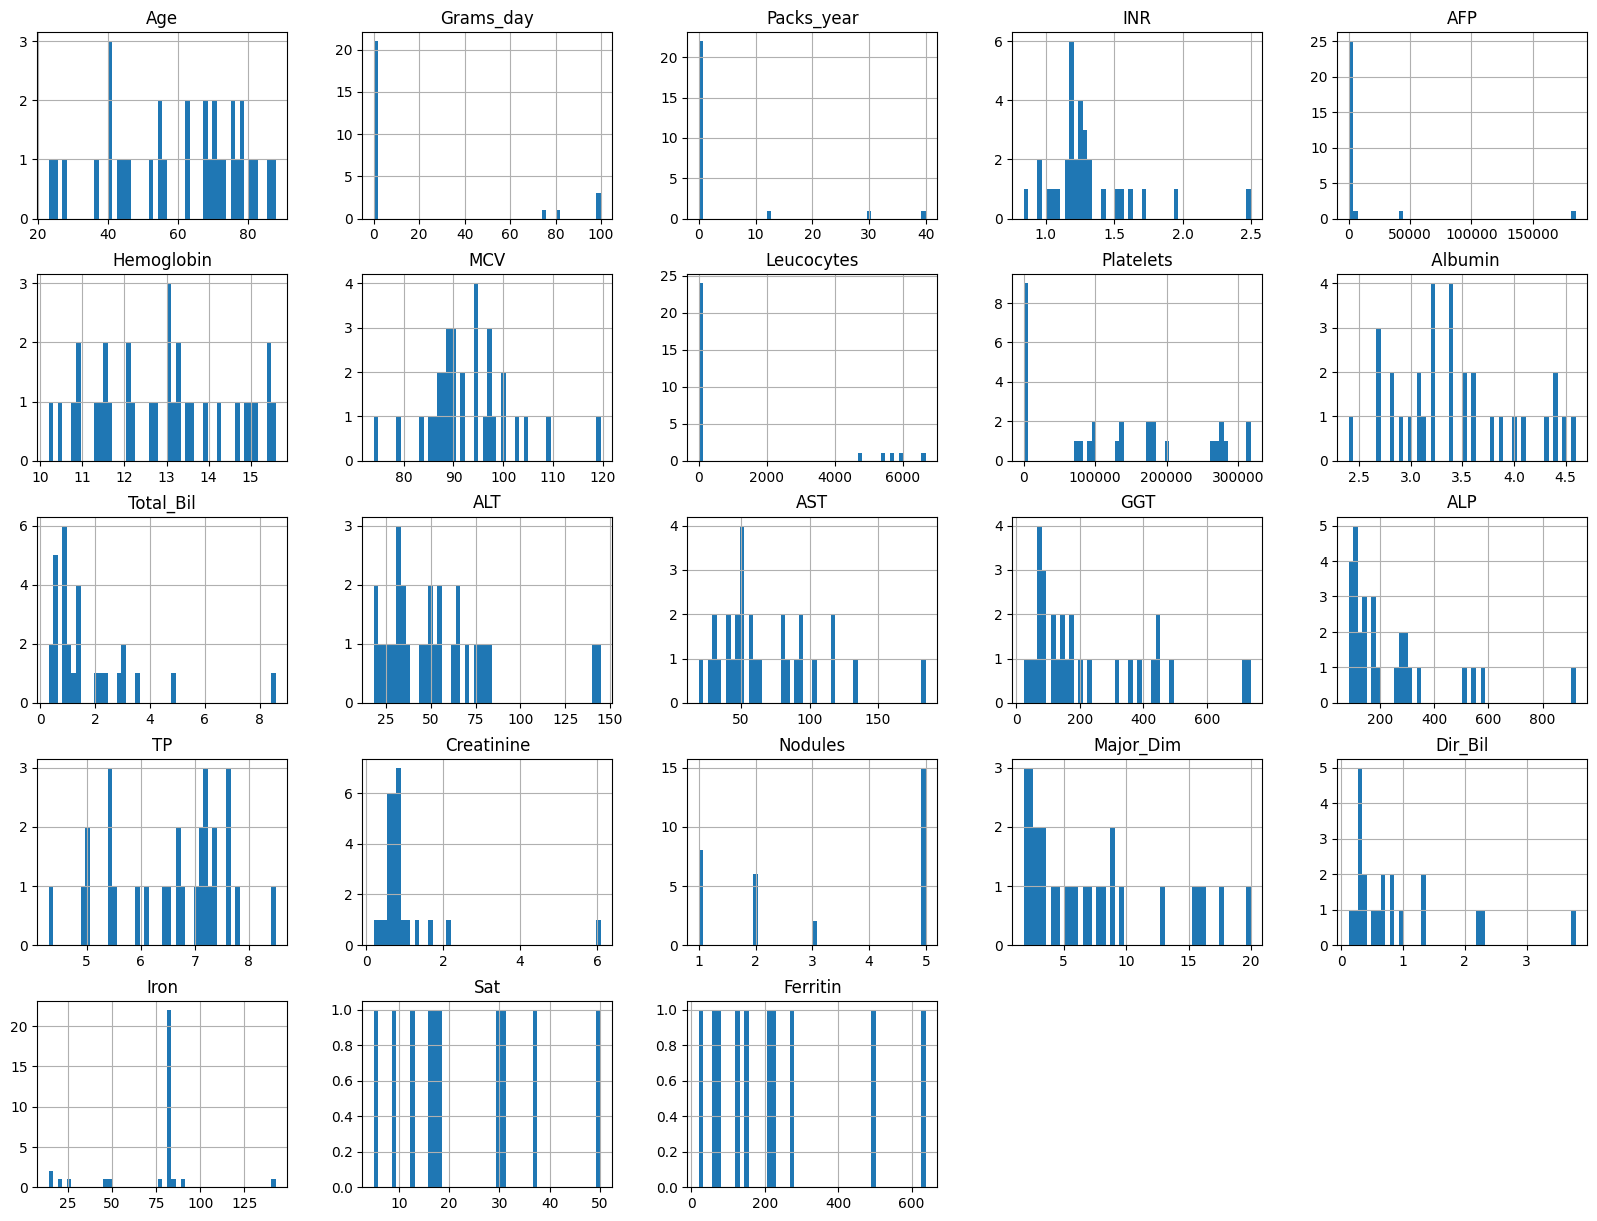

Número de mulheres infetadas: 32


In [ ]:
female = df[df['Gender'] == 'Female']
female.hist(bins=50, figsize=(20,15))
#plt.show()
num_female=female.shape[0]
print("Número de mulheres infetadas:",num_female)

Há muitos mais homens infetados que mulheres mas não existem evidências óbvias que os diversos parâmetros diferem significativamente de mulher para homem.

In [ ]:
jovens = df[(df['Age'] >= 20) & (df['Age'] < 40)]
num_jovens=jovens.shape[0]
print("Número de jovens infetados:",num_jovens)
adultos = df[(df['Age'] >= 40) & (df['Age'] < 60)]
num_adultos=adultos.shape[0]
print("Número de adultos infetados:",num_adultos)
idosos = df[(df['Age'] >= 60) & (df['Age'] < 100)]
num_idosos=idosos.shape[0]
print("Número de idosos infetados:",num_idosos)

Número de jovens infetados: 6
Número de adultos infetados: 42
Número de idosos infetados: 117


Análise de outliers tendo em conta a sua definição estatística:

In [ ]:
numeric_columns = df.columns[23:]  # Exclude the first 22 non-numeric columns
for column in numeric_columns:
    if df[column].dtype == 'float64':  # Check if the column contains float values
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        counter=0
        # Count outliers directly using boolean indexing
        outliers = (df[column] < lower_limit) | (df[column] > upper_limit)
        num_outliers = outliers.sum()

        print(f"Column: {column}")
        #print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
        #print(f"Lower Limit: {lower_limit:.2f}, Upper Limit: {upper_limit:.2f}")
        print(f"Number of outliers: {num_outliers}\n")

        class_distribution = df[column].value_counts()

        print("Class Distribution:")
        print(class_distribution)

        if df[column].nunique() <= 1:
            print("Constant or Near-Constant Feature")

Column: Grams_day
Number of outliers: 2

Column: Packs_year
Number of outliers: 3

Column: INR
Number of outliers: 9

Column: AFP
Number of outliers: 31

Column: Hemoglobin
Number of outliers: 1

Column: MCV
Number of outliers: 6

Column: Leucocytes
Number of outliers: 39

Column: Platelets
Number of outliers: 2

Column:  Albumin
Number of outliers: 0

Column: Total_Bil
Number of outliers: 16

Column: ALT
Number of outliers: 12

Column: AST
Number of outliers: 13

Column: GGT
Number of outliers: 11

Column: ALP
Number of outliers: 11

Column: TP
Number of outliers: 9

Column: Creatinine
Number of outliers: 17

Column: Nodules
Number of outliers: 0

Column: Major_Dim
Number of outliers: 7

Column: Dir_Bil
Number of outliers: 14

Column: Iron
Number of outliers: 0

Column: Sat
Number of outliers: 1

Column: Ferritin
Number of outliers: 2

